In [1]:
!git clone https://github.com/NearANDfar13/NLP_Winter_2024.git

Cloning into 'NLP_Winter_2024'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 106 (delta 47), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (106/106), 5.02 MiB | 6.04 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [2]:
#Import the dataset "San Fran New Sample"
import pandas as pd

df = pd.read_excel('/content/NLP_Winter_2024/NA_San_Fran_New_Sample.xlsx')

#Display DataFrame 'df'
df.head()

,ID,Day,Short_Name,Full_Name,Place,Frequency,Publication,Text,Page,Link,Datengeber
0,2797055-3,19/04/1906,Badische Presse,Badische Presse : Generalanzeiger der Residenz...,Karlsruhe,täglich,1890-1944,Die Marinestationen am Süllen Ozean versuchten...,4.0,NaN,NaN
1,2958285-4,19/04/1906,Der Beobachter,"Der Beobachter, ein Volksblatt aus Schwaben","Stuttgart, Württemberg",täglich,1833-1920,"Erdbeben in Ealifornien. New-Sjork, 18. April....",3.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek
2,2436020-X,19/04/1906,Berliner Börsen-Zeitung,"Berliner Börsen-Zeitung, Tageszeitung für Poli...",Berlin,täglich,1857-1938,richten lassen die Verwüstung noch größer ersc...,5.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN
3,3144747-8,19/04/1906,Cannstatter Zeitung,"Cannstatter Zeitung, allgemeiner Anzeiger für ...","Stuttgart, Cannstatt, Stuttgart-Bad Cannstatt,...",täglich,1896-1914,"Cincinnati, 18. April. Einem hiesigen Blatte w...",1.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN
4,3144747-8,19/04/1906,Cannstatter Zeitung,"Cannstatter Zeitung, allgemeiner Anzeiger für ...","Stuttgart, Cannstatt, Stuttgart-Bad Cannstatt,...",täglich,1896-1914,"Newyork, 19. April. Ten letzten Nachrichten an...",3.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN


In [3]:
#From https://github.com/Deutsche-Digitale-Bibliothek/ddblabs-summer-school-2024/blob/main/002_Alto-XML-Dateien_einlesen_und_Texte_extrahieren.ipynb
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import plotly.graph_objects as go

In [4]:
df.to_csv("San_Fran_content.csv", encoding = "UTF-8")

In [5]:
df = pd.read_csv("San_Fran_content.csv", encoding = "UTF-8")
df

,Unnamed: 0,ID,Day,Short_Name,Full_Name,Place,Frequency,Publication,Text,Page,Link,Datengeber
0,0,2797055-3,19/04/1906,Badische Presse,Badische Presse : Generalanzeiger der Residenz...,Karlsruhe,täglich,1890-1944,Die Marinestationen am Süllen Ozean versuchten...,4.0,NaN,NaN
1,1,2958285-4,19/04/1906,Der Beobachter,"Der Beobachter, ein Volksblatt aus Schwaben","Stuttgart, Württemberg",täglich,1833-1920,"Erdbeben in Ealifornien. New-Sjork, 18. April....",3.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek
2,2,2436020-X,19/04/1906,Berliner Börsen-Zeitung,"Berliner Börsen-Zeitung, Tageszeitung für Poli...",Berlin,täglich,1857-1938,richten lassen die Verwüstung noch größer ersc...,5.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN
3,3,3144747-8,19/04/1906,Cannstatter Zeitung,"Cannstatter Zeitung, allgemeiner Anzeiger für ...","Stuttgart, Cannstatt, Stuttgart-Bad Cannstatt,...",täglich,1896-1914,"Cincinnati, 18. April. Einem hiesigen Blatte w...",1.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN
4,4,3144747-8,19/04/1906,Cannstatter Zeitung,"Cannstatter Zeitung, allgemeiner Anzeiger für ...","Stuttgart, Cannstatt, Stuttgart-Bad Cannstatt,...",täglich,1896-1914,"Newyork, 19. April. Ten letzten Nachrichten an...",3.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
141,141,3000029-4,23/04/1906,Saale-Zeitung,"Saale-Zeitung, allgemeine Zeitung für Mittelde...",Halle (Saale),"täglich, unregelmäßig",1873-1933,"würden, für die die Geſellſchaften erſatzpflic...",1.0,https://www.deutsche-digitale-bibliothek.de/ne...,"Martin-Luther-Universität Halle-Wittenberg, Un..."
142,142,3000029-4,23/04/1906,Saale-Zeitung,"Saale-Zeitung, allgemeine Zeitung für Mittelde...",Halle (Saale),"täglich, unregelmäßig",1873-1933,war das Angebot am Sonnabend weniger umfangrei...,2.0,https://www.deutsche-digitale-bibliothek.de/ne...,"Martin-Luther-Universität Halle-Wittenberg, Un..."
143,143,3139225-8,23/04/1906,Schwäbische Tagwacht,"Schwäbische Tagwacht, Organ der Sozialdemokrat...",Stuttgart,NaN,1890-1931,"auf, auszu harren, bis alle Forderungen befrie...",4.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek
144,144,3139225-8,23/04/1906,Schwäbische Tagwacht,"Schwäbische Tagwacht, Organ der Sozialdemokrat...",Stuttgart,NaN,1890-1931,Ercraukungsgefahr dadurch bedeutend vermehrt. ...,6.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek


In [7]:
#Most Frequent Words Analysis - Another Method
#Text from DataFrame
content = df['Text'].tolist()
content = [text.lower() for text in content]
print(content[0])

die marinestationen am süllen ozean versuchten, die verbindung durch fuakeutelegraphie herzustellen. der bürgermeister von san francisco organisiert bereits ein hflfskomitee im pro- visorischen arntsgebäude. me „southern pacisic-bcchn" ver- suchte gestern abend den erste« zng nach caklaad zu bringen, von wo san francisco mittels boote« über die bucht zu erreichen den in san franzisko schicken. nachmittag wurde eine danernfe verbindung mit der pacifische« küste wieder erlangt. hettanstalt für hautleide»» heidelberg. [...] von jackland berichtet wird, soll gerüchten zufolge, das amerikanische geschwader des stillen ozeans, das in der bucht von san francisco ankerte, infolge des erdbebens daselbst gesunken sein. eine bestätissng der meldung fehlt noch. — newyork, 19. april. meldung van nachts 1 uhr. die [...] laufe der bormittags von den einstürzenden gebäuden erschlagen. hd newyork, 19. april. der „herald" schätzt die ziffer der in san francisco ums lebe« gekommenen ans 5000 personen. me

In [9]:
#Remove punctuation and Tokenize
listofthings = []
for entry in content:
    for c in string.punctuation:
            entry = entry.replace(c, " ")
    words = entry.split()
    listofthings.extend(words)

In [10]:
print(listofthings)

['die', 'marinestationen', 'am', 'süllen', 'ozean', 'versuchten', 'die', 'verbindung', 'durch', 'fuakeutelegraphie', 'herzustellen', 'der', 'bürgermeister', 'von', 'san', 'francisco', 'organisiert', 'bereits', 'ein', 'hflfskomitee', 'im', 'pro', 'visorischen', 'arntsgebäude', 'me', '„southern', 'pacisic', 'bcchn', 'ver', 'suchte', 'gestern', 'abend', 'den', 'erste«', 'zng', 'nach', 'caklaad', 'zu', 'bringen', 'von', 'wo', 'san', 'francisco', 'mittels', 'boote«', 'über', 'die', 'bucht', 'zu', 'erreichen', 'den', 'in', 'san', 'franzisko', 'schicken', 'nachmittag', 'wurde', 'eine', 'danernfe', 'verbindung', 'mit', 'der', 'pacifische«', 'küste', 'wieder', 'erlangt', 'hettanstalt', 'für', 'hautleide»»', 'heidelberg', 'von', 'jackland', 'berichtet', 'wird', 'soll', 'gerüchten', 'zufolge', 'das', 'amerikanische', 'geschwader', 'des', 'stillen', 'ozeans', 'das', 'in', 'der', 'bucht', 'von', 'san', 'francisco', 'ankerte', 'infolge', 'des', 'erdbebens', 'daselbst', 'gesunken', 'sein', 'eine', 'b

In [11]:
#Remove numbers
words = [word for word in listofthings if not word.isdecimal()]
print(words)

['die', 'marinestationen', 'am', 'süllen', 'ozean', 'versuchten', 'die', 'verbindung', 'durch', 'fuakeutelegraphie', 'herzustellen', 'der', 'bürgermeister', 'von', 'san', 'francisco', 'organisiert', 'bereits', 'ein', 'hflfskomitee', 'im', 'pro', 'visorischen', 'arntsgebäude', 'me', '„southern', 'pacisic', 'bcchn', 'ver', 'suchte', 'gestern', 'abend', 'den', 'erste«', 'zng', 'nach', 'caklaad', 'zu', 'bringen', 'von', 'wo', 'san', 'francisco', 'mittels', 'boote«', 'über', 'die', 'bucht', 'zu', 'erreichen', 'den', 'in', 'san', 'franzisko', 'schicken', 'nachmittag', 'wurde', 'eine', 'danernfe', 'verbindung', 'mit', 'der', 'pacifische«', 'küste', 'wieder', 'erlangt', 'hettanstalt', 'für', 'hautleide»»', 'heidelberg', 'von', 'jackland', 'berichtet', 'wird', 'soll', 'gerüchten', 'zufolge', 'das', 'amerikanische', 'geschwader', 'des', 'stillen', 'ozeans', 'das', 'in', 'der', 'bucht', 'von', 'san', 'francisco', 'ankerte', 'infolge', 'des', 'erdbebens', 'daselbst', 'gesunken', 'sein', 'eine', 'b

In [12]:
#Import Stopwords
nltk.download('stopwords')
stopger = stopwords.words('german')

#More Stopwords from Deutsche Digitale Bibliothek
newStopwords = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
                'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'vgl', '\x97', '•', '■', 'v', 'beim', 'de','—','ge','la','be','en','que','el','ten','ver','gen','sei','nen','del','nen', 'se','schen','un','land','te','ei','aires', 'las', 'los', '«']

stopger.extend(newStopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
print(stopger)

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euc

In [15]:
#Remove Stopwords
tokens_without_sw = [word for word in words if word not in stopger]
print(tokens_without_sw)

['marinestationen', 'süllen', 'ozean', 'versuchten', 'verbindung', 'fuakeutelegraphie', 'herzustellen', 'bürgermeister', 'san', 'francisco', 'organisiert', 'bereits', 'hflfskomitee', 'pro', 'visorischen', 'arntsgebäude', 'me', '„southern', 'pacisic', 'bcchn', 'suchte', 'gestern', 'abend', 'erste«', 'zng', 'caklaad', 'bringen', 'san', 'francisco', 'mittels', 'boote«', 'bucht', 'erreichen', 'san', 'franzisko', 'schicken', 'nachmittag', 'wurde', 'danernfe', 'verbindung', 'pacifische«', 'küste', 'erlangt', 'hettanstalt', 'hautleide»»', 'heidelberg', 'jackland', 'berichtet', 'gerüchten', 'zufolge', 'amerikanische', 'geschwader', 'stillen', 'ozeans', 'bucht', 'san', 'francisco', 'ankerte', 'infolge', 'erdbebens', 'daselbst', 'gesunken', 'bestätissng', 'meldung', 'fehlt', 'newyork', 'april', 'meldung', 'van', 'nachts', 'uhr', 'laufe', 'bormittags', 'einstürzenden', 'gebäuden', 'erschlagen', 'hd', 'newyork', 'april', '„herald', 'schätzt', 'ziffer', 'san', 'francisco', 'ums', 'lebe«', 'gekommen

In [16]:
# Count frequency
counts = Counter(tokens_without_sw)

# Top 20 words
top_20_words = counts.most_common(20)
top_150_words = counts.most_common(150)
print(top_20_words)

[('san', 1770), ('francisco', 1365), ('april', 744), ('erdbeben', 729), ('stadt', 485), ('feuer', 396), ('uhr', 309), ('worden', 307), ('zerstört', 303), ('wurde', 285), ('gebäude', 263), ('wurden', 256), ('flammen', 226), ('new', 212), ('millionen', 171), ('franzisko', 160), ('teil', 160), ('ganze', 156), ('newyork', 155), ('trümmern', 150)]


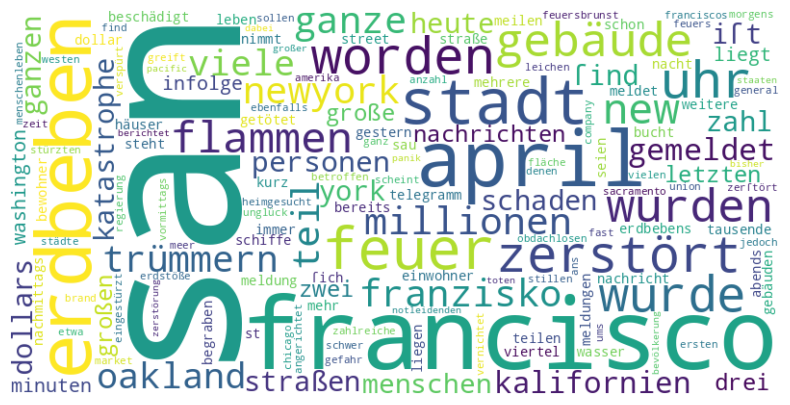

In [17]:
#WordCloud
word_freq_dict = dict(top_150_words)

wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

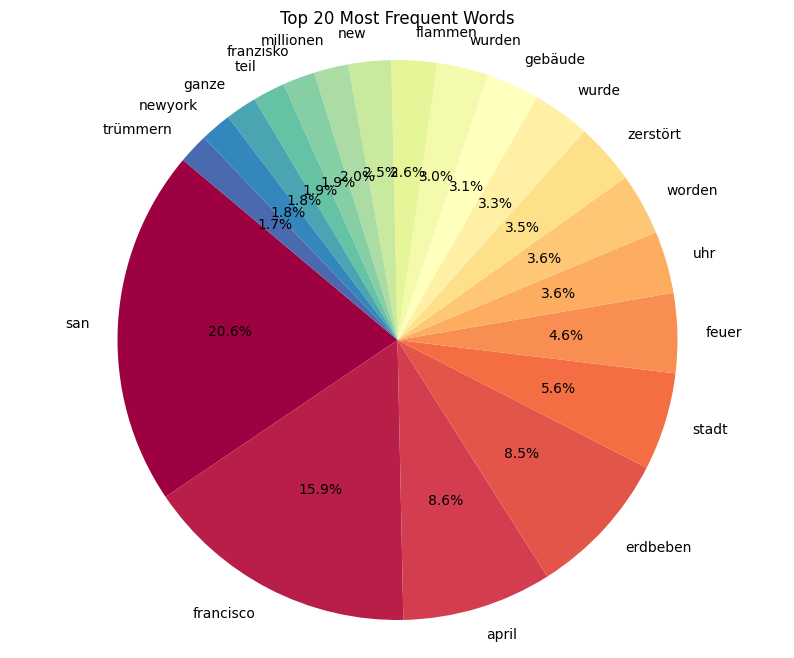

In [18]:
#Bar Graph Word Frequency
def create_circle(word_count):
  labels = [word[0] for word in word_count]
  sizes = [word[1] for word in word_count]
  colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

  plt.figure(figsize=(10, 8))
  plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
  plt.axis('equal')
  plt.title('Top 20 Most Frequent Words')
  plt.show()

create_circle(top_20_words)

In [21]:
def tokenize(content):

  wordlist = []
  for word in content.split():
    for char in string.punctuation:
      word = word.strip(char)
    wordlist.append(word)

  words = [word for word in wordlist if not word.isdecimal()]
  tokens_without_sw = [word for word in words if word not in stopger]

  return tokens_without_sw

In [24]:
#Most frequent word per day
df['token'] = df['Text'].apply(tokenize)
df

,Unnamed: 0,ID,Day,Short_Name,Full_Name,Place,Frequency,Publication,Text,Page,Link,Datengeber,token
0,0,2797055-3,19/0,Badische Presse,Badische Presse : Generalanzeiger der Residenz...,Karlsruhe,täglich,1890-1944,Die Marinestationen am Süllen Ozean versuchten...,4.0,NaN,NaN,"[Die, Marinestationen, Süllen, Ozean, versucht..."
1,1,2958285-4,19/0,Der Beobachter,"Der Beobachter, ein Volksblatt aus Schwaben","Stuttgart, Württemberg",täglich,1833-1920,"Erdbeben in Ealifornien. New-Sjork, 18. April....",3.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek,"[Erdbeben, Ealifornien, New-Sjork, April, Heut..."
2,2,2436020-X,19/0,Berliner Börsen-Zeitung,"Berliner Börsen-Zeitung, Tageszeitung für Poli...",Berlin,täglich,1857-1938,richten lassen die Verwüstung noch größer ersc...,5.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN,"[richten, lassen, Verwüstung, größer, erschein..."
3,3,3144747-8,19/0,Cannstatter Zeitung,"Cannstatter Zeitung, allgemeiner Anzeiger für ...","Stuttgart, Cannstatt, Stuttgart-Bad Cannstatt,...",täglich,1896-1914,"Cincinnati, 18. April. Einem hiesigen Blatte w...",1.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN,"[Cincinnati, April, Einem, hiesigen, Blatte, O..."
4,4,3144747-8,19/0,Cannstatter Zeitung,"Cannstatter Zeitung, allgemeiner Anzeiger für ...","Stuttgart, Cannstatt, Stuttgart-Bad Cannstatt,...",täglich,1896-1914,"Newyork, 19. April. Ten letzten Nachrichten an...",3.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN,"[Newyork, April, Ten, letzten, Nachrichten, an..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,141,3000029-4,23/0,Saale-Zeitung,"Saale-Zeitung, allgemeine Zeitung für Mittelde...",Halle (Saale),"täglich, unregelmäßig",1873-1933,"würden, für die die Geſellſchaften erſatzpflic...",1.0,https://www.deutsche-digitale-bibliothek.de/ne...,"Martin-Luther-Universität Halle-Wittenberg, Un...","[Geſellſchaften, erſatzpflichtig, ſeien, New, ..."
142,142,3000029-4,23/0,Saale-Zeitung,"Saale-Zeitung, allgemeine Zeitung für Mittelde...",Halle (Saale),"täglich, unregelmäßig",1873-1933,war das Angebot am Sonnabend weniger umfangrei...,2.0,https://www.deutsche-digitale-bibliothek.de/ne...,"Martin-Luther-Universität Halle-Wittenberg, Un...","[Angebot, Sonnabend, weniger, umfangreich, let..."
143,143,3139225-8,23/0,Schwäbische Tagwacht,"Schwäbische Tagwacht, Organ der Sozialdemokrat...",Stuttgart,NaN,1890-1931,"auf, auszu harren, bis alle Forderungen befrie...",4.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek,"[auszu, harren, Forderungen, befriedigt, seien..."
144,144,3139225-8,23/0,Schwäbische Tagwacht,"Schwäbische Tagwacht, Organ der Sozialdemokrat...",Stuttgart,NaN,1890-1931,Ercraukungsgefahr dadurch bedeutend vermehrt. ...,6.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek,"[Ercraukungsgefahr, dadurch, bedeutend, vermeh..."


In [25]:
def counting(tokens):
  counts = Counter(tokens)
  return counts

In [26]:
df['counts'] = df['token'].apply(counting)
df

,Unnamed: 0,ID,Day,Short_Name,Full_Name,Place,Frequency,Publication,Text,Page,Link,Datengeber,token,counts
0,0,2797055-3,19/0,Badische Presse,Badische Presse : Generalanzeiger der Residenz...,Karlsruhe,täglich,1890-1944,Die Marinestationen am Süllen Ozean versuchten...,4.0,NaN,NaN,"[Die, Marinestationen, Süllen, Ozean, versucht...","{'Die': 16, 'Marinestationen': 1, 'Süllen': 1,..."
1,1,2958285-4,19/0,Der Beobachter,"Der Beobachter, ein Volksblatt aus Schwaben","Stuttgart, Württemberg",täglich,1833-1920,"Erdbeben in Ealifornien. New-Sjork, 18. April....",3.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek,"[Erdbeben, Ealifornien, New-Sjork, April, Heut...","{'Erdbeben': 5, 'Ealifornien': 1, 'New-Sjork':..."
2,2,2436020-X,19/0,Berliner Börsen-Zeitung,"Berliner Börsen-Zeitung, Tageszeitung für Poli...",Berlin,täglich,1857-1938,richten lassen die Verwüstung noch größer ersc...,5.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN,"[richten, lassen, Verwüstung, größer, erschein...","{'richten': 1, 'lassen': 2, 'Verwüstung': 1, '..."
3,3,3144747-8,19/0,Cannstatter Zeitung,"Cannstatter Zeitung, allgemeiner Anzeiger für ...","Stuttgart, Cannstatt, Stuttgart-Bad Cannstatt,...",täglich,1896-1914,"Cincinnati, 18. April. Einem hiesigen Blatte w...",1.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN,"[Cincinnati, April, Einem, hiesigen, Blatte, O...","{'Cincinnati': 1, 'April': 15, 'Einem': 1, 'hi..."
4,4,3144747-8,19/0,Cannstatter Zeitung,"Cannstatter Zeitung, allgemeiner Anzeiger für ...","Stuttgart, Cannstatt, Stuttgart-Bad Cannstatt,...",täglich,1896-1914,"Newyork, 19. April. Ten letzten Nachrichten an...",3.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN,"[Newyork, April, Ten, letzten, Nachrichten, an...","{'Newyork': 1, 'April': 5, 'Ten': 1, 'letzten'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,141,3000029-4,23/0,Saale-Zeitung,"Saale-Zeitung, allgemeine Zeitung für Mittelde...",Halle (Saale),"täglich, unregelmäßig",1873-1933,"würden, für die die Geſellſchaften erſatzpflic...",1.0,https://www.deutsche-digitale-bibliothek.de/ne...,"Martin-Luther-Universität Halle-Wittenberg, Un...","[Geſellſchaften, erſatzpflichtig, ſeien, New, ...","{'Geſellſchaften': 1, 'erſatzpflichtig': 1, 'ſ..."
142,142,3000029-4,23/0,Saale-Zeitung,"Saale-Zeitung, allgemeine Zeitung für Mittelde...",Halle (Saale),"täglich, unregelmäßig",1873-1933,war das Angebot am Sonnabend weniger umfangrei...,2.0,https://www.deutsche-digitale-bibliothek.de/ne...,"Martin-Luther-Universität Halle-Wittenberg, Un...","[Angebot, Sonnabend, weniger, umfangreich, let...","{'Angebot': 1, 'Sonnabend': 1, 'weniger': 1, '..."
143,143,3139225-8,23/0,Schwäbische Tagwacht,"Schwäbische Tagwacht, Organ der Sozialdemokrat...",Stuttgart,NaN,1890-1931,"auf, auszu harren, bis alle Forderungen befrie...",4.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek,"[auszu, harren, Forderungen, befriedigt, seien...","{'auszu': 1, 'harren': 1, 'Forderungen': 1, 'b..."
144,144,3139225-8,23/0,Schwäbische Tagwacht,"Schwäbische Tagwacht, Organ der Sozialdemokrat...",Stuttgart,NaN,1890-1931,Ercraukungsgefahr dadurch bedeutend vermehrt. ...,6.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek,"[Ercraukungsgefahr, dadurch, bedeutend, vermeh...","{'Ercraukungsgefahr': 1, 'dadurch': 1, 'bedeut..."


In [27]:
import plotly.express as px

# Wort, dessen Häufigkeit wir analysieren wollen
word_to_analyze = 'Erdbeben'

# Häufigkeit des Wortes pro Jahr aggregieren
word_counts = df[['Day', 'counts']].copy()
word_counts['count'] = word_counts['counts'].apply(lambda x: x.get(word_to_analyze, 0))
word_counts = word_counts.groupby('Day')['count'].sum().reset_index()

# Liniendiagramm erstellen
fig = px.line(word_counts, x='Day', y='count', title=f'Häufigkeit des Wortes "{word_to_analyze}" pro Tag', height=550)
fig.update_layout(xaxis_title='Tag', yaxis_title='Häufigkeit')
fig.show()

In [28]:
import plotly.express as px

# Wort, dessen Häufigkeit wir analysieren wollen
word_to_analyze = 'Feuer'

# Häufigkeit des Wortes pro Jahr aggregieren
word_counts = df[['Day', 'counts']].copy()
word_counts['count'] = word_counts['counts'].apply(lambda x: x.get(word_to_analyze, 0))
word_counts = word_counts.groupby('Day')['count'].sum().reset_index()

# Liniendiagramm erstellen
fig = px.line(word_counts, x='Day', y='count', title=f'Häufigkeit des Wortes "{word_to_analyze}" pro Tag', height=550)
fig.update_layout(xaxis_title='Tag', yaxis_title='Häufigkeit')
fig.show()

In [29]:
# Anzahl der Einträge pro Jahr zählen
entry_counts = df.groupby('Day').size().reset_index(name='entry_count')

# Liniendiagramm erstellen
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=word_counts['Day'], y=word_counts['count'], mode='lines', name=f'Häufigkeit des Wortes "{word_to_analyze}"'))
fig2.add_trace(go.Scatter(x=entry_counts['Day'], y=entry_counts['entry_count'], mode='lines', name='Anzahl der Einträge'))

fig2.update_layout(
    title=f'Häufigkeit des Wortes "{word_to_analyze}" und Anzahl der Einträge pro Tag',
    xaxis_title='Tag',
    yaxis_title='Werte',
    height=550
)

fig2.show()